<center>
<img src="../../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в анализ данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Авторы материала: преподаватели ФКН НИУ ВШЭ Кашницкий Юрий, Гитман Игорь и Захаров Егор
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# Семинар 3. Линейная алгебра и Python
## Часть 5. Линейная регрессия, градиентный спуск



|тип целевой переменной:|непрерывная|категориальная|
|---|---|---|
|**с учителем:**|**регрессия**|классификация|
|**без учителя:**|уменьшение размерности|кластеризация|

**Зачем это нужно?**

Почему нам нужно знать о линейной регрессии?
- широко используется
- быстро работает
- легко использовать
- легко интерпретировать
- база для более сложных методов

In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Считываем данные по рекламе в DataFrame**

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', 
                   index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Признаки - количество денег, потраченное на три разных типа рекламы.

Целевая переменная - уровень продаж.

In [3]:
data.shape

(200, 4)

**Исследуем признаки**

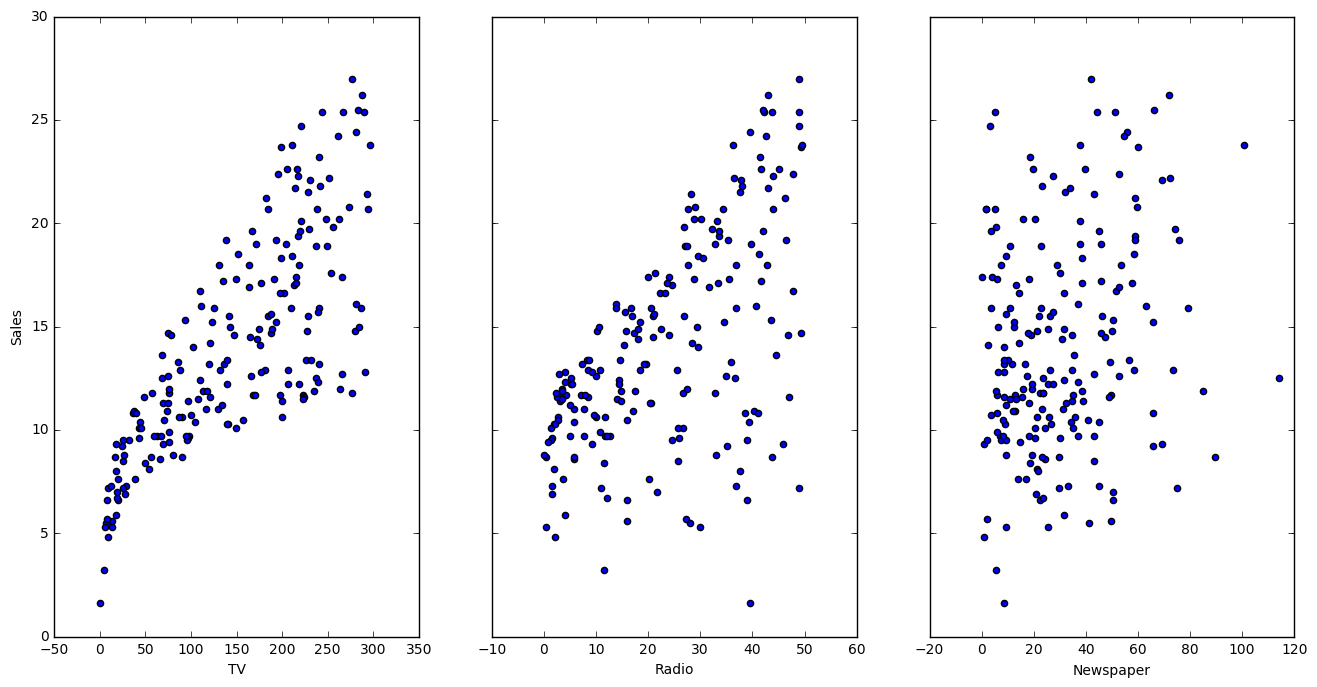

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2]);

**Возникают вопросы:**

1. Есть ли какая-либо связь между тратами на рекламу и продажами?
2. Насколько сильна эта связь?
3. Какие типы рекламы влияют на продажи?
4. Насколько сильно?
5. Можно ли предсказать продажи по тратам на рекламу?

Будем минимизировать квадратичную ошибку приближения зависимости прямой линией $y = mx+b$:

$$error(m, b) = \frac{1}{N} \sum_{i=1}^N(y_i - (mx_i + b))^2,$$где $N$ - число точек.

**Суть градиентного спуска**.

<img src="../../img/gradient_descent.png">
Для минимизации функции двух переменных $F(x_1, x_2)$:
- Выбираются начальные приближения $x_1^{(0)}$ и $x_2^{(0)}$, а также параметр $\alpha$
- Повторяется до сходимости:
    - $$x_1^{(t+1)} = x_1^{(t)} -\alpha \frac{\partial}{\partial x_1}F(x_1^{(t)}, x_2^{(t)})$$
    - $$x_2^{(t)} = x_2^{(t+1)} -\alpha \frac{\partial}{\partial x_2}F(x_1^{(t)}, x_2^{(t)})$$

**Простой код градиентного спуска.**

In [10]:
# a = mx + b
# m is slope, b is y-intercept

def sq_error(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent(points, starting_b, 
                            starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

def run_gradient_descent(points):
    learning_rate = 0.00001
    initial_b = 0
    initial_m = 0
    num_iterations = 10000
    print("Starting gradient descent at\
          b = %.2f, m = %.2f, error = %.2f"%(initial_b, initial_m, \
          sq_error(initial_b, initial_m, points)))
    [b, m] = gradient_descent(points, initial_b, 
                                     initial_m, learning_rate, 
                                     num_iterations)
    print("After %d iterations b = %.2f, m = %.2f, error = %.2f"\
          %(num_iterations, b, m, sq_error(b, m, points)))
    return [b, m]

Регрессия данных по продажам, исходя из трат на ТВ-рекламу:

Starting gradient descent at          b = 0.00, m = 0.00, error = 223.72
After 10000 iterations b = 0.35, m = 0.08, error = 21.83


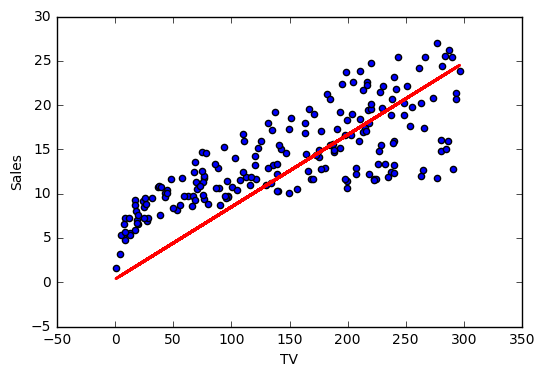

In [11]:
X = np.array(data.iloc[:,0])[:,np.newaxis]
y = np.array(data.iloc[:,3])[:,np.newaxis]
points = np.hstack([X, y])
[b, m] = run_gradient_descent(points)
predictions = m*X + b
data.plot(kind='scatter', x='TV', y='Sales')
plt.plot(X, predictions, c='red', linewidth=2);

Векторизованный вариант, используется векторная нотация:

In [12]:
# a = w_0 + w_1 x
# Q = 1/N sum_i (y_i - (w_0 + w_1 x))^2

def Q(w, X, y):
    N = X.size
    return (1.0/N) * np.sum((y - (w[1]*X + w[0]))**2)

def dQ(w, X, y):
    N = X.size
    dQdw0 = -(2.0/N) * np.sum(y - (w[1]*X + w[0]))
    dQdw1 = -(2.0/N) * np.sum((y - (w[1]*X + w[0])) * X)
    return np.array([dQdw0, dQdw1])

def step_gradient_2(w, X, y, alpha):
    return w - alpha*dQ(w, X, y)

def gradient_descent2(X, y, w_init, alpha, n_iter):
    w = w_init
    for i in range(n_iter):
        w = step_gradient_2(w, X, y, alpha)
    return w

def run_gradient_descent2(X, y):
    w_init = np.zeros(2)
    n_iter = 1000
    alpha = 0.00001
    print("Starting gradient descent at w_0 = %.2f, w_1 = %.2f, error = %.2f"\
          %(w_init[0], w_init[1], Q(w_init, X, y)))
    w = gradient_descent2(X, y, w_init, alpha, n_iter)
    print("After %d iterations w_0 = %.2f, w_1 = %.2f, error = %.2f"\
          %(n_iter, w[0], w[1], Q(w, X, y)))
    return w

Регрессия данных по продажам, исходя из трат на газетную рекламу:

Starting gradient descent at w_0 = 0.00, w_1 = 0.00, error = 223.72
After 1000 iterations w_0 = 0.09, w_1 = 0.32, error = 76.16


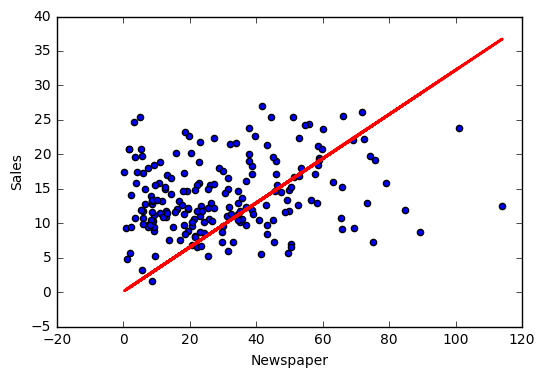

In [13]:
X = np.array(data.iloc[:,2])
y = np.array(data.iloc[:,3])
w = run_gradient_descent2(X, y)
predictions = w[1]*X + w[0]
data.plot(kind='scatter', x='Newspaper', y='Sales')
plt.plot(X, predictions, c='red', linewidth=2);